<a href="https://colab.research.google.com/github/Adebolaorogun/Data-analysis/blob/main/Gitcoin_analysis_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This project involved exploration and analysis of the data with the goal of finding trends related to grabnt approval. At this time, focus was placed on grant results and grant contributions following data cleaning. More work will be required to refine analysis and create a dynamic open source tool that allows users to define and test their own hypothesis against the data collected.

> In the meantime, I've created a first draft using the tool Akuko - https://app.akuko.io/post/2b107419-ac30-4376-b172-5f82fd3880bf

> From review of trends, it seems that grants with more complete submissions have a slight edge in terms of approval. This is specifically shown with github url and website inclusion which could be related to evidence of work and activity. Additionally, there does seem to be a trend regarding constribution amount and distinct count of contributors. There were quite a few denied grants that had a lot more contributions to a small number of distinct contributors.

In [ ]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
# Links to base tables
results = pd.read_json('/content/drive/MyDrive/Gitcoin_assignment/Copy of grants_applications_gr15.json', orient='index')
applications = pd.read_json('/content/drive/MyDrive/Gitcoin_assignment/Copy of gr15_grants.json', orient='index')
contributions = pd.read_csv('/content/drive/MyDrive/Gitcoin_assignment/Copy of hackathon-contributions-dataset.csv')
contributions_v2 = pd.read_csv('/content/drive/MyDrive/Gitcoin_assignment/Copy of hackathon-contributions-dataset_v2.csv')

total_contributions = pd.concat([contributions , contributions_v2], ignore_index=True, axis=0)

In [ ]:
# Review and print of base tables
print('Results')
print(len(results))
print(results.head())
results.to_csv('results.csv', index=False)

print('Applications')
print(len(applications))
print(applications.head())
applications.to_csv('applications.csv', index=False)

print('Contributions')
print(len(total_contributions))
print(total_contributions.head())
total_contributions.to_csv('contributions.csv', index=False)

Results
808
   grant_id  active  approved                                     address  \
0      6841   False     False  0xDc4C1D5D42f829dfd4b772d3a678CfB178ee6476   
1      6842    True      True  0xCE41b49d28800De3Ba9925f68D82129dFc4b870B   
2      6843   False     False  0x8871b4405018e75f08a0bbc9f1fb0241f8b188ae   
3      6844   False     False  0x4C3477e9756610fcB7Dac007C03aE0D666fFc54E   
4      6845   False     False  0x9486C5CFE392763A25dC30C9F62f6D21f73d220f   

                                               title  \
0                                            4C Labs   
1    C# library for accessing NFTs on mobile devices   
2                                VDAO - First VC DAO   
3  Unisound: Web3.0 sample pack marketplace for m...   
4    Univerz.io decentralized - marketplace platform   

                                                 url  \
0             https://gitcoin.co/grants/6841/4c-labs   
1  https://gitcoin.co/grants/6842/c-library-for-a...   
2   https://gitcoin.

In [ ]:
# Dataset with grant approval results as well as data from the application
results_extended = results.merge(applications, on='grant_id', how='left')
results_extended.to_csv('results_extended.csv', index=False)

results_extended.head()

,grant_id,active_x,approved,address_x,title_x,url,description_x,created_on_x,active_y,title_y,...,contribution_count,contributor_count,description_y,website,github_project_url,twitter_handle_2,twitter_handle_1,twitter_verified,created_on_y,last_update
0,6841,False,False,0xDc4C1D5D42f829dfd4b772d3a678CfB178ee6476,4C Labs,https://gitcoin.co/grants/6841/4c-labs,Project Core:\r\n\t4C hopes to become the Brid...,2022-06-24T03:39:54.292-06:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6842,True,True,0xCE41b49d28800De3Ba9925f68D82129dFc4b870B,C# library for accessing NFTs on mobile devices,https://gitcoin.co/grants/6842/c-library-for-a...,This is a lightweight open source C# library t...,2022-06-24T07:41:41.000-06:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6843,False,False,0x8871b4405018e75f08a0bbc9f1fb0241f8b188ae,VDAO - First VC DAO,https://gitcoin.co/grants/6843/vdao-first-vc-dao,The project is a fund investing (early stage i...,2022-06-24T09:37:40.087-06:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6844,False,False,0x4C3477e9756610fcB7Dac007C03aE0D666fFc54E,Unisound: Web3.0 sample pack marketplace for m...,https://gitcoin.co/grants/6844/unisound-web30-...,"Unisound enables professional, yet undiscovere...",2022-06-24T11:00:32.560-06:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6845,False,False,0x9486C5CFE392763A25dC30C9F62f6D21f73d220f,Univerz.io decentralized - marketplace platform,https://gitcoin.co/grants/6845/univerzio-decen...,Hello Fam we are looking to raise little funds...,2022-06-24T12:33:04.737-06:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Dataset of contributions extended with join on grant_id
contributions_extended = total_contributions.merge(results, on='grant_id', how='left')
contributions_extended.rename(columns = {'address_x':'address', 'address_y':'result_address'}, inplace = True)

contributions_extended.to_csv('contributions_result_extended_.csv', index=False)
contributions_extended.head()

,txn_id,user_id,address,grant_id,chain,token,amount_in_usdt,timestamp,txn_hash,network,active,approved,result_address,title,url,description,created_on
0,9a7955760b945121d7ac2e3ccf8c53bb19389939d83a78...,205fdbe0783c1725849a6c243e23156d3c6679e2403beb...,0x76f69dcddd0593b0aff5fd3280c3433ddb68e0d2,6972,eth_std,ETH,1.283650,2022-09-22 23:59:55.773190+00:00,NaN,NaN,True,True,0x01d79BcEaEaaDfb8fD2F2f53005289CFcF483464,Lenstube,https://gitcoin.co/grants/6972/lenstube,"Lenstube, an open-source web3 video-sharing so...",2022-07-22T23:57:26.000-06:00
1,8d656b874ef8b642bbab30e2e0164922287d8156182e61...,9872683fceb5011d980cbdce560d5c3c1dd4007ee936be...,0x1bc5ebee4738fd95bd96751c45a90889f772e0f3,2400,eth_zksync,ETH,1.001247,2022-09-22 23:59:53.052568+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fe14bb2c777595fcc407de7ec454e26ddaa48df2c11a6e...,67d35e9ecb471310efe99c9d12ffc6a9816db2cf6e9ac0...,0x3812801cbf0e41413db4835a5e36228ad45e32bf,7243,eth_polygon,MATIC,1.001943,2022-09-22 23:59:52.331798+00:00,NaN,NaN,False,True,0xc323b7F24C2fD032780fC285917a24Ca9e70E366,Pyme,https://gitcoin.co/grants/7243/pyme,Pyme is a web3 marketing platform allowing use...,2022-08-28T08:55:20.000-06:00
3,1d5435fae1a9942df47eb4a30c49acf418888fc7bbd233...,9872683fceb5011d980cbdce560d5c3c1dd4007ee936be...,0x1bc5ebee4738fd95bd96751c45a90889f772e0f3,3023,eth_zksync,ETH,1.001247,2022-09-22 23:59:52.133974+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e3aa9456a2fac0019086e42b9a065ac0e40d108e436d1b...,9872683fceb5011d980cbdce560d5c3c1dd4007ee936be...,0x1bc5ebee4738fd95bd96751c45a90889f772e0f3,4811,eth_zksync,ETH,1.001247,2022-09-22 23:59:51.260699+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Create similar dataframe names and remove of records with no approval details
grant_results = results_extended[pd.notnull(results_extended['active_y'])]
contributions = contributions_extended[pd.notnull(contributions_extended['active'])]

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

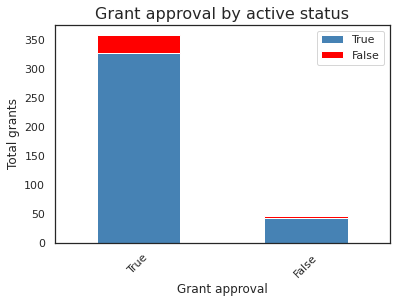

In [ ]:
 #set seaborn plotting aesthetics
sns.set(style='white')


dataset_1 = pd.DataFrame({'True': [len(grant_results.loc[(grant_results['active_x'] == True) & (grant_results['approved'] == True)]), len(grant_results.loc[(grant_results['active_x'] == True) & (grant_results['approved'] == False)])]  ,
                         'False': [len(grant_results.loc[(grant_results['active_x'] == False) & (grant_results['approved'] == True)]), len(grant_results.loc[(grant_results['active_x'] == False) & (grant_results['approved'] == False)])] , },
                        index=['True', 'False'])

#create stacked bar chart
dataset_1.plot(kind='bar', stacked=True, color=['steelblue', 'red'])

#add overall title
plt.title('Grant approval by active status', fontsize=16)

#add axis titles
plt.xlabel('Grant approval')
plt.ylabel('Total grants')

#rotate x-axis labels
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

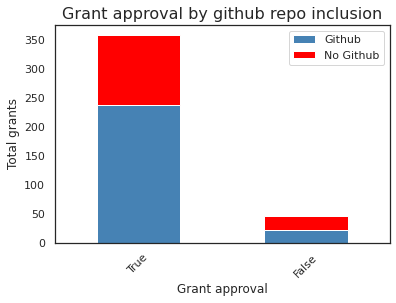

In [ ]:
 #set seaborn plotting aesthetics
sns.set(style='white')


dataset_1 = pd.DataFrame({'Github': [len(grant_results.loc[(grant_results['github_project_url'].notnull() ) & (grant_results['approved'] == True)]), len(grant_results.loc[(grant_results['github_project_url'].notnull() ) & (grant_results['approved'] == False)])]  ,
                         'No Github': [len(grant_results.loc[(grant_results['github_project_url'].isnull()) & (grant_results['approved'] == True)]), len(grant_results.loc[(grant_results['github_project_url'].isnull()) & (grant_results['approved'] == False)])] , },
                        index=['True', 'False'])

#create stacked bar chart
dataset_1.plot(kind='bar', stacked=True, color=['steelblue', 'red'])

#add overall title
plt.title('Grant approval by github repo inclusion', fontsize=16)

#add axis titles
plt.xlabel('Grant approval')
plt.ylabel('Total grants')

#rotate x-axis labels
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

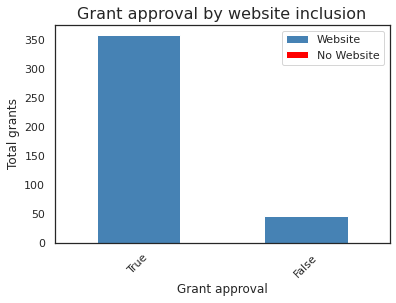

In [ ]:
 #set seaborn plotting aesthetics
sns.set(style='white')


dataset_1 = pd.DataFrame({'Website': [len(grant_results.loc[(grant_results['website'].notnull() ) & (grant_results['approved'] == True)]), len(grant_results.loc[(grant_results['website'].notnull() ) & (grant_results['approved'] == False)])]  ,
                         'No Website': [len(grant_results.loc[(grant_results['website'].isnull()) & (grant_results['approved'] == True)]), len(grant_results.loc[(grant_results['website'].isnull()) & (grant_results['approved'] == False)])] , },
                        index=['True', 'False'])

#create stacked bar chart
dataset_1.plot(kind='bar', stacked=True, color=['steelblue', 'red'])

#add overall title
plt.title('Grant approval by website inclusion', fontsize=16)

#add axis titles
plt.xlabel('Grant approval')
plt.ylabel('Total grants')

#rotate x-axis labels
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

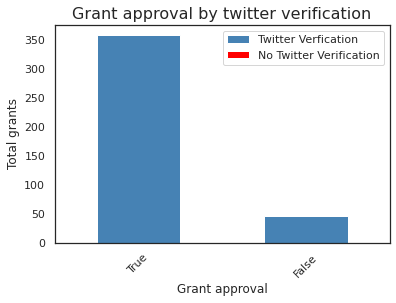

In [ ]:
 #set seaborn plotting aesthetics
sns.set(style='white')


dataset_1 = pd.DataFrame({'Twitter Verfication': [len(grant_results.loc[(grant_results['twitter_verified'].notnull() ) & (grant_results['approved'] == True)]), len(grant_results.loc[(grant_results['twitter_verified'].notnull() ) & (grant_results['approved'] == False)])]  ,
                         'No Twitter Verification': [len(grant_results.loc[(grant_results['twitter_verified'].isnull()) & (grant_results['approved'] == True)]), len(grant_results.loc[(grant_results['twitter_verified'].isnull()) & (grant_results['approved'] == False)])] , },
                        index=['True', 'False'])

#create stacked bar chart
dataset_1.plot(kind='bar', stacked=True, color=['steelblue', 'red'])

#add overall title
plt.title('Grant approval by twitter verification', fontsize=16)

#add axis titles
plt.xlabel('Grant approval')
plt.ylabel('Total grants')

#rotate x-axis labels
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

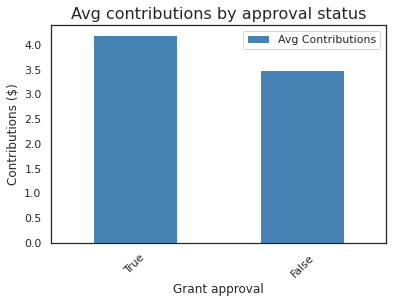

In [ ]:
 #set seaborn plotting aesthetics
sns.set(style='white')


dataset_1 = pd.DataFrame({'Avg Contributions': [(contributions['amount_in_usdt'].loc[contributions['approved'] == True]).mean(), (contributions['amount_in_usdt'].loc[contributions['approved'] == False]).mean()] },
                        index=['True', 'False'])

#create stacked bar chart
dataset_1.plot(kind='bar', color=['steelblue'])

#add overall title
plt.title('Avg contributions by approval status', fontsize=16)

#add axis titles
plt.xlabel('Grant approval')
plt.ylabel('Contributions ($)')

#rotate x-axis labels
plt.xticks(rotation=45)